# U.T.3 Metodología del ML.
# Introducción
La calidad de los datos y la cantidad de información que contienen los datos son puntos clave para el buen
funcionamiento de los algoritmos de ML.

Asegurar que los datos son adecuados y correctos es el primer paso para encontrar una buena solución

El preprocesado de los datos es crucial.

![](img/ut03_00.png)

https://scikit-learn.org/stable/modules/preprocessing.html

## Lectura de datos
![](img/ut03_01.png)

![](img/ut03_02.png)

## Acceso a valores
![](img/ut03_03.png)

## Explorar los datos

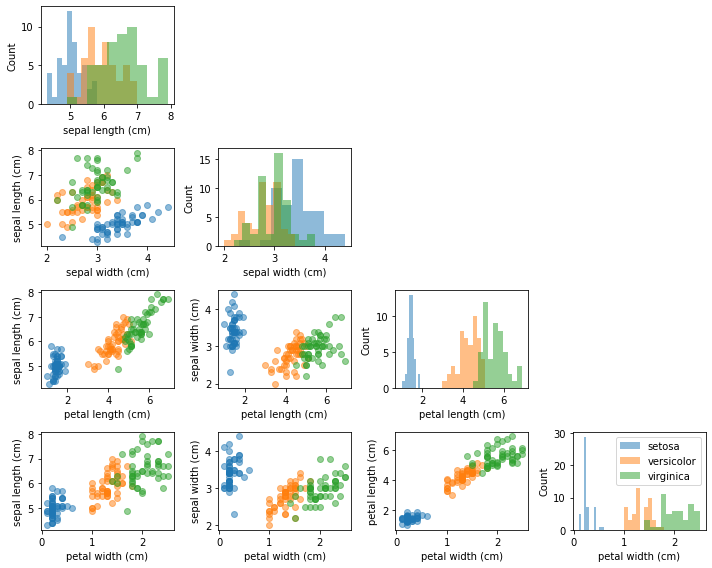

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

df = datasets.load_iris()

names = df['feature_names']
X = df.data
y = df.target

fig, axes = scatterplotmatrix(X[y == 0], figsize=(10, 8), alpha=0.5)
fig, axes = scatterplotmatrix(X[y == 1], fig_axes=(fig, axes), alpha=0.5)
fig, axes = scatterplotmatrix(X[y == 2], fig_axes=(fig, axes), alpha=0.5, names=names)

plt.tight_layout()
plt.legend(labels=df['target_names'])
plt.show()


# Preprocesado de datos
## Problemas comunes de los datos
- **Ausencia de valores**: Es muy común que, si estamos trabajando con un conjunto de datos grande, algunos valores estén
vacíos. Impiden que el sistema de aprendizaje automático pueda entrenarse correctamente. Lo trataremos más en profundidad.
- **Inconsistencia de datos**: Errores en el formato o en el tipo de alguno de ellos. Dependiendo de la variable que
estemos analizando, se deberán aplicar unas técnicas de validación u otras, que en ocasiones puede llegar a requerir
conocimiento experto del problema.
- **Valores duplicados**: Puede suceder que en alguna ocasión encontremos registros duplicados en nuestro conjunto
de datos. Es importante detectar estos registros y eliminar todos aquellos que se repitan más de una vez. No hacer esto podría suponer que el elemento duplicado sea tenido más en cuenta que el resto de los datos.
- **Outliers o extremos**: Valores que su valor es muy diferente a la media. Se verá más adelante.

![](img/ut03_04.png)

## Ausencia de valores
Los datos faltantes se pueden representar como espacios en blanco, valores NaN o como NULL.
La mayoría de las herramientas necesitan datos numéricos. Hay que convertirlos.

Podremos realizar las siguientes operaciones
- Eliminar la columna o la fila
- Convertir los valores

### Convertir
- Interpolación (media, moda)
    - **df.fillna(df.mean())**
- Asignación a un valor fijo: al mínimo, al máximo, a cero o a uno.
    - **df.fillna(0)**
- Otros métodos: La clase SimpleImputer

### Eliminar
- Encontrar el número de valores nulos por característica.
    - **dataframe.isnull().sum()**
- Eliminar las filas con NaN
    - **dataframe.dropna(axis=0)**
- Eliminar las columnas con NAN
    - **dataframe.dropna(axis = 1)**
- Eliminar solo aquellas filas con todas sus columnas a NaN
    - **dataframe.dropna(how= 'all')**
- Eliminar aquellas filas con menos de un número de valores. (4 En el ejemplo)
    - **dataframe.dropna(thresh = 4)**
- Eliminar aquellas filas en las que el NaN está en una columna específica
    - **dataframe.dropna(subset=[‘c'])**

### SimpleImputer
Pertenece a las clases transformadoras. El método fit se usa sobre los datos de entrenamiento para ajustar la clase.
El método **transform** se usa para cambiar los datos.

![](img/ut03_05.png)

In [2]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
inputed_data = imr.transform(df.values)

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

https://scikit-learn.org/stable/modules/impute.html

Parámetros
- **missing_values**: int, float, str, np.nan or None, default=np.nan. Valores a buscar para cambiar.
- **Strategy**: string, default='mean' (Estrategia de asignación)
    - "mean", Remplazo con la media, solo para valores numéricos
    - "median", Remplazo con la mediana, solo para valores numéricos.
    - "most_frequent", Remplazo con el valor más frecuente.
    - "constant", se remplaza con el valor del atributo fill_value.

## Valores extremos
Un valor extremo en ML es un valor atípico, destacado, excepcional, anormal.
Serán los valores que se "escapan al rango en donde se concentran la mayoría de muestras".
Pueden afectar considerablemente a los resultados que pueda obtener un modelo.

### Significado de los outliers
- **Error**: Si tenemos un grupo de "edades de personas" y tenemos una persona con 160 años, seguramente sea un error
de carga de datos. En este caso, la detección de outliers nos ayuda a detectar errores.
- **Límites**: En otros casos, podemos tener valores que se escapan del "grupo medio", pero queremos mantener el
dato modificado, para que no perjudique al aprendizaje del modelo de ML.
- **Punto de Interés**: puede que sean los casos "anómalos" los que queremos detectar y que sean nuestro objetivo
(y no nuestro enemigo!)

### Detección

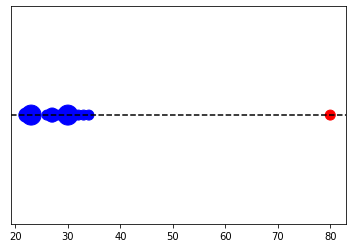

In [3]:
import matplotlib.pyplot as plt
import numpy as np

edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])
edad_unique, counts = np.unique(edades, return_counts=True)

sizes = counts*100
colors = ['blue']*len(edad_unique)
colors[-1] = 'red'

plt.axhline(1, color='k', linestyle='--')
plt.scatter(edad_unique, np.ones(len(edad_unique)), s=sizes, color=colors)
plt.yticks([])
plt.show()

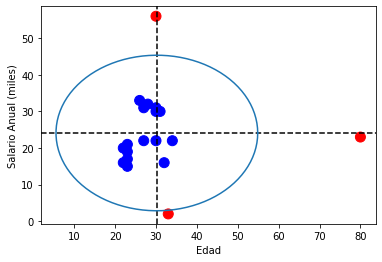

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

edades = np.array([22,22,23,23,23,23,26,27,27,28,30,30,30,30,31,32,33,34,80])
salario_anual_miles = np.array([16,20,15,21,19,17,33,22,31,32,56,30,22,31,30,16,2,22,23])
media = (salario_anual_miles).mean()
std_x = (salario_anual_miles).std()*2
media_y = (edades).mean()
std_y = (edades).std()*2
colors = ['blue']*len(salario_anual_miles)
for index, x in enumerate(salario_anual_miles):
    if abs(x-media) > std_x:
        colors[index] = 'red'
for index, x in enumerate(edades):
    if abs(x-media_y) > std_y:
        colors[index] = 'red'

plt.scatter(edades, salario_anual_miles, s=100, color=colors)
plt.axhline(media, color='k', linestyle='--')
plt.axvline(media_y, color='k', linestyle='--')
v=media     #y-position of the center
u=media_y    #x-position of the center
b=std_x     #radius on the y-axis
a=std_y    #radius on the x-axis
t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
plt.xlabel('Edad')
plt.ylabel('Salario Anual (miles)')
plt.show()

### Efecto del tratamiento
![](img/ut03_06.png)

### Otros tratamientos
Detección automática: PyOD
Ofrece distintos algoritmos, entre ellos Knn que analiza la cercanía entre las muestras

In [5]:
from pyod.models.knn import KNN
import pandas as pd

compras_mes = np.array([1,2,1,20,1,0,3,2,3,0,5,3,2,1,0,1,2,2,2])
X = pd.DataFrame(data={'edad':edades,'salario':salario_anual_miles, 'compras':compras_mes})

clf = KNN(contamination=0.18)
clf.fit(X)
y_pred = clf.predict(X)
print(X.describe())
print(X[y_pred == 1]) # muestra los outliers

            edad    salario    compras
count  19.000000  19.000000  19.000000
mean   30.210526  24.105263   2.684211
std    12.673590  10.913268   4.372294
min    22.000000   2.000000   0.000000
25%    23.000000  18.000000   1.000000
50%    28.000000  22.000000   2.000000
75%    30.500000  30.500000   2.500000
max    80.000000  56.000000  20.000000
    edad  salario  compras
3     23       21       20
10    30       56        5
16    33        2        2
18    80       23        2


![](img/ut03_07.png)

### Cómo los trato
- Dejarlos
- Modificarlos (tratarlos como nulos)
- Eliminarlos

La decisión dependerá del problema

### Ampliación
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html


## Datos categóricos
Cuando recibimos un conjunto de datos, además de encontrar valores numéricos, en la mayoría de las ocasiones debemos
trabajar con datos no estructurados.
Pueden ser los textos, imágenes, vídeos, etc.
Para poder utilizarnos para entrenar nuestro modelo deben ser convertidos a números.

En la recogida de datos puede que varias características sean categóricas en vez de números

Hay Dos tipos
- Tengan que estar ordenadas (XL > L > M > S)
- Sin orden expreso (rojo, blanco, verde)

Tendremos que hacer un mapeo de los valores de las categorías a valores numéricos
Teniendo en cuenta que esta asignación pude imponer un orden que antes no existía: (rojo=0, blanco=1, verde=2)
El rojo será menor.

### Mapeo manual
Cuando recibimos un conjunto de datos, además de encontrar valores numéricos, en la mayoría de las ocasiones debemos
trabajar con datos no estructurados

In [6]:
size_mapping = {'XL': 3, 'L':2, 'M':1}
df['categorical_1'] = df['categorical_1'].map(size_mapping)

# opción segunda, la numeración de forma automática
class_mapping = {
     label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
df['classlabel'] = df['classlabel'].map(class_mapping)

### LabelEncoder
El proceso de codificación de etiquetas es muy normal, por lo que se ha implementado una clase LabelEncoder
que realiza todo el proceso

In [7]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)

# Para obtener la conversión inversa
class_le.inverse_transform(y)

### One-Hot: scikit
La codificaciones anteriores introducen orden, información no existente en los datos

El codificador OneHot creará una nueva característica (columna) por cada uno de los valores de la etiqueta a convertir,
poniéndolo a 1 en la correspondiente y en el resto a cero.

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

colores = np.array(['rojo', 'rojo', 'verde', 'rojo', 'azul'])
precios = np.array([200, 100, 200, 333, 444])
etiquetas = np.array(['a', 'a', 'b', 'b', 'b'])

df = pd.DataFrame(data={'color': colores, 'precio': precios, 'etiqueta': etiquetas})
print(df)

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['color']]).toarray())
df = df.join(enc_df)
df = df.drop(['color'], axis=1)
print(df)

   color  precio etiqueta
0   rojo     200        a
1   rojo     100        a
2  verde     200        b
3   rojo     333        b
4   azul     444        b
   precio etiqueta    0    1    2
0     200        a  0.0  1.0  0.0
1     100        a  0.0  1.0  0.0
2     200        b  0.0  0.0  1.0
3     333        b  0.0  1.0  0.0
4     444        b  1.0  0.0  0.0


In [9]:
# One-Hot: pandas
import numpy as np
import pandas as pd

colores = np.array(['rojo', 'rojo', 'verde', 'rojo', 'azul'])
precios = np.array([200, 100, 200, 333, 444])
df = pd.DataFrame(data={'color': colores, 'precio': precios})
print(df)

df = pd.get_dummies(df, columns=["color"], prefix=["Type_is"])
print(df)

   color  precio
0   rojo     200
1   rojo     100
2  verde     200
3   rojo     333
4   azul     444
   precio  Type_is_azul  Type_is_rojo  Type_is_verde
0     200             0             1              0
1     100             0             1              0
2     200             0             0              1
3     333             0             1              0
4     444             1             0              0


### One-Hot multiple: scikit

In [10]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

colores = np.array(['rojo', 'rojo', 'verde', 'rojo', 'azul'])
precios = np.array([200, 100, 200, 333, 444])
etiquetas = np.array(['a', 'a', 'b', 'b', 'b'])

df = pd.DataFrame(data={'color': colores, 'precio': precios, 'etiqueta': etiquetas})
c_transf = ColumnTransformer([('onehot', OneHotEncoder(), [0, 2]), ('nothing', 'passthrough', [1])])

df = pd.DataFrame(c_transf.fit_transform(df[['color', 'precio', 'etiqueta']]),
                  columns=['c_a', 'c_r', 'c_v', 'e_a', 'e_b', 'precio'])

print(df)

   c_a  c_r  c_v  e_a  e_b  precio
0  0.0  1.0  0.0  1.0  0.0   200.0
1  0.0  1.0  0.0  1.0  0.0   100.0
2  0.0  0.0  1.0  0.0  1.0   200.0
3  0.0  1.0  0.0  0.0  1.0   333.0
4  1.0  0.0  0.0  0.0  1.0   444.0


In [11]:
# One-Hot multiple: pandas
import numpy as np
import pandas as pd

colores = np.array(['rojo', 'rojo', 'verde', 'rojo', 'azul'])
precios = np.array([200, 100, 200, 333, 444])
etiquetas = np.array(['a', 'a', 'b', 'b', 'b'])
df = pd.DataFrame(data={'color': colores, 'precio': precios, 'etiqueta': etiquetas})
print(df)

X = df[['color', 'precio', 'etiqueta']].values
df = pd.get_dummies(df, columns=["color", "etiqueta"], prefix=["P", "E"])
print(df)

   color  precio etiqueta
0   rojo     200        a
1   rojo     100        a
2  verde     200        b
3   rojo     333        b
4   azul     444        b
   precio  P_azul  P_rojo  P_verde  E_a  E_b
0     200       0       1        0    1    0
1     100       0       1        0    1    0
2     200       0       0        1    0    1
3     333       0       1        0    0    1
4     444       1       0        0    0    1


## Normalización
Normalización significa comprimir o extender los valores de la variable para que estén en un rango definido.

Una mala aplicación de la normalización, o una elección descuidada del método de normalización puede arruinar los
datos, y con ello el análisis.

No existe un método ideal de normalización que funcione para todas las formas de variables.
Es trabajo nuestro conocer cómo se distribuyen los datos, saber si existen anomalías, comprobar rangos, etc.
Con este conocimiento, se puede seleccionar la mejor técnica para no distorsionar los datos.

**Peligros**
- La normalización puede distorsionar tus datos

### Métodos
- **Escalado**. Va a transformar los valores de las características de forma que estén confinados en un rango [a, b],
típicamente [0, 1] o [-1, 1]
- **Estandarización**. Va a transformar las características de forma que todas compartan un mismo valor medio
y una misma desviación media. Este mecanismo permite a los algoritmos aprender los pesos más rápidamente, pero puede hacer bajar el rendimiento del mismo

![](img/ut03_08.png)

El utilizar estas técnicas no nos aseguran mejores rendimientos

Hay que probar con y sin normalización y ver cómo se adapta el algoritmo

In [12]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_wine = load_wine()
X, y = df_wine.data, df_wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)
# Escalado
mms = MinMaxScaler()
X_train_esc = mms.fit_transform(X_train)
X_test_esc = mms.transform(X_test)
print(X_train_esc[0], X_test_esc[0])

# Estandarización
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std[0], X_test_std[0])

[0.64619883 0.83201581 0.4248366  0.46236559 0.27160494 0.35172414
 0.09704641 0.68       0.18987342 0.23623446 0.45744681 0.28571429
 0.19400856] [0.69005848 0.22924901 0.64052288 0.30645161 0.55555556 0.69655172
 0.51687764 0.52       0.39873418 0.40497336 0.69148936 0.60805861
 0.78245364]
[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362] [ 0.89443737 -0.38811788  1.10073064 -0.81201711  1.13201117  1.09807851
  0.71204102  0.18101342  0.06628046  0.51285923  0.79629785  0.44829502
  1.90593792]


### Otros métodos
- **Normalizer**. Similar a StandarScaler en cuanto a concepto pero se ejecuta sobre el ejemplo (la fila) no la columna
- **RobustScaler**. Recomendado si trabajamos con conjuntos de datos muy pequeños

**Es importante remarcar que para usar el método fit deben utilizarse los datos de entrenamiento y ejecutarse tanto
para los datos de prueba como los de entrenamiento.**

In [12]:
mms.fit(X_train)
X_train_norm = mms.transform(X_train)
X_test_norm = mms.transform(X_test)
